
Marketing for Banking

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 


Import the necessary files for data cleaning and exploration

In [26]:
url= 'https://raw.githubusercontent.com/ajkam/schulich_data_science/main/DS2%20Assignment%201/train.csv'
url2= 'https://raw.githubusercontent.com/ajkam/schulich_data_science/main/DS2%20Assignment%201/test.csv'



In [27]:
# Specify the delimiter and quote character
delimiter = ';'
quotechar = '"'

# Read the CSV data with the specified delimiter and quote character
df = pd.read_csv(url, delimiter=delimiter, quotechar=quotechar)
df_test = pd.read_csv(url2, delimiter=delimiter, quotechar=quotechar)

# Now, you should have a DataFrame with correctly separated columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [30]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The above code helps me understand the data regarding descriptive statistics, datatypes, and what the columns are. while performing some cleaning by dropping the duplicates and checking if there are any missing values.

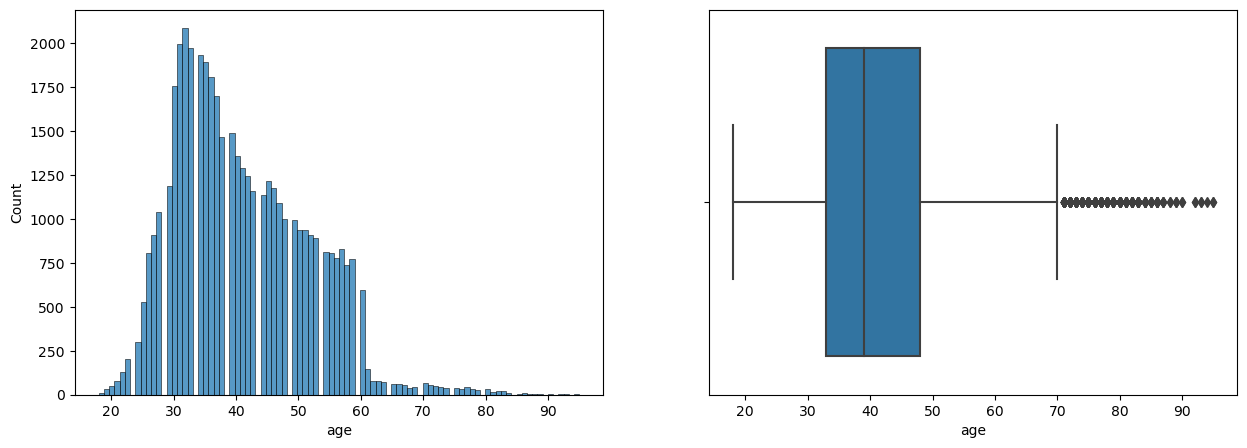

0.6847952047866451
0.31940232676995794
Positive skew
Leptokurtic


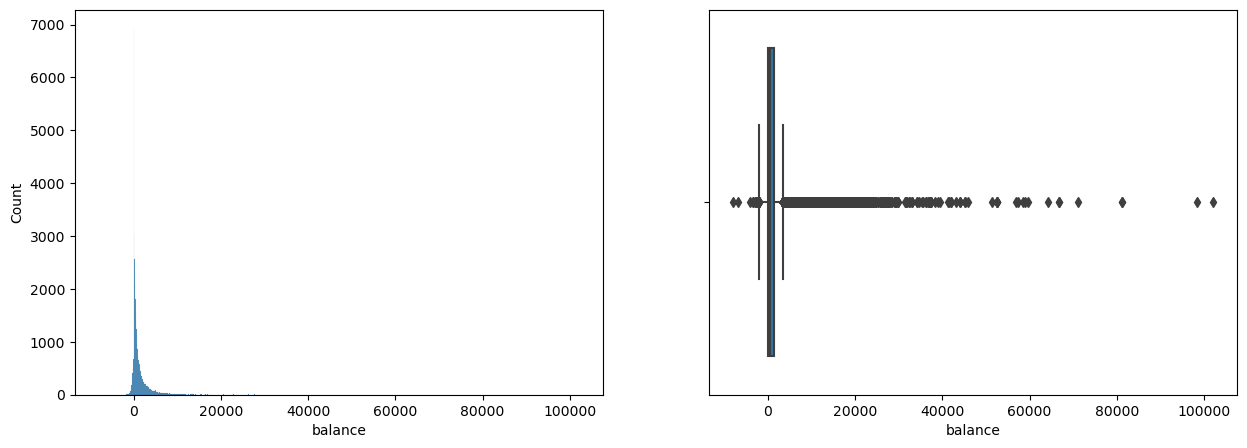

8.360030947252687
140.73584832577242
Positive skew
Leptokurtic


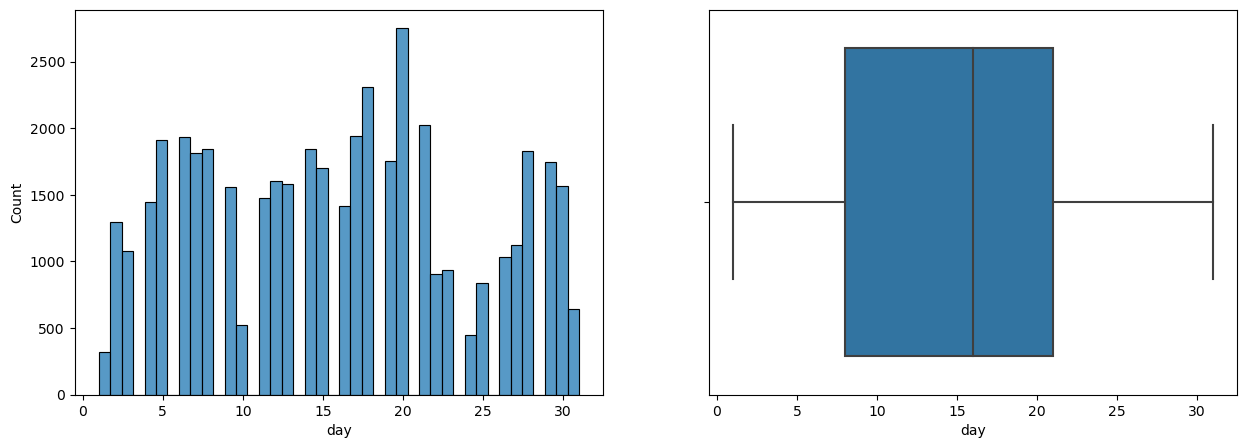

0.09307592583897241
-1.0599128678304488
Little to No skew
Platykurtic


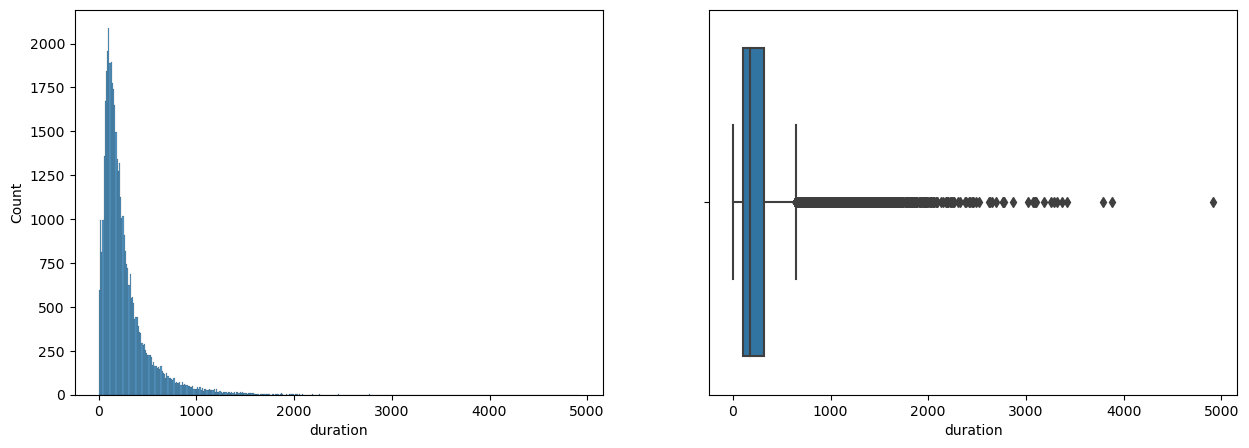

3.1442137770103913
18.151774935186822
Positive skew
Leptokurtic


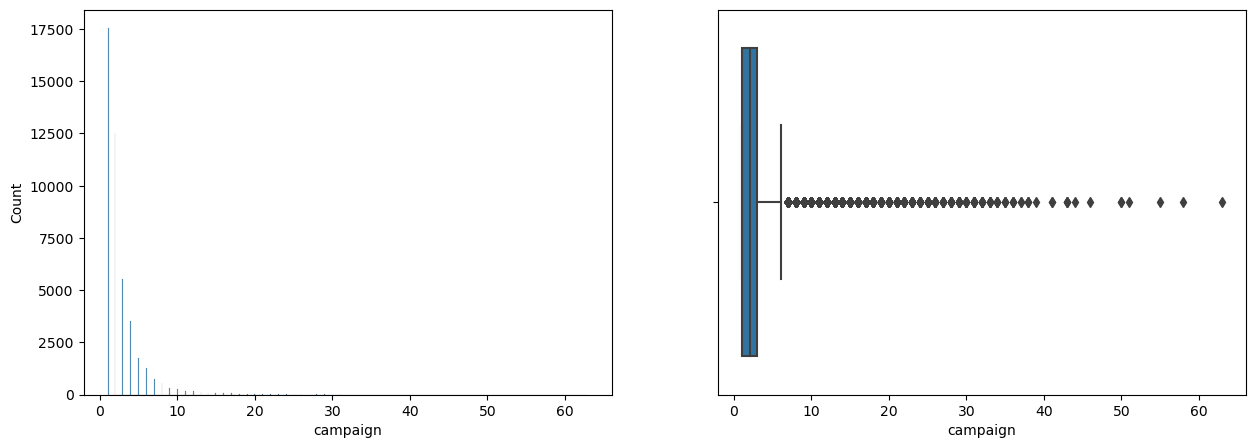

4.898487638410557
39.24517750942221
Positive skew
Leptokurtic


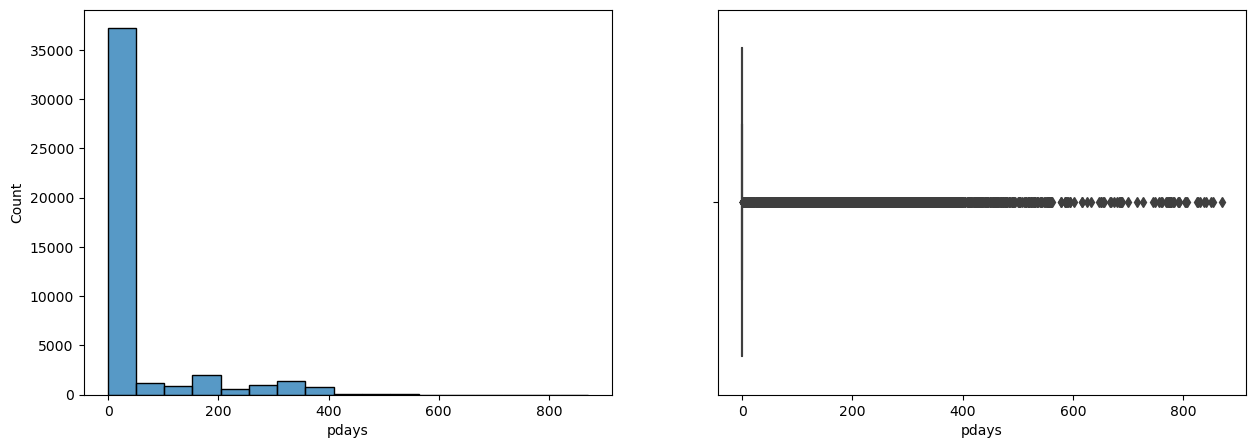

2.615628689259389
6.934295545084991
Positive skew
Leptokurtic


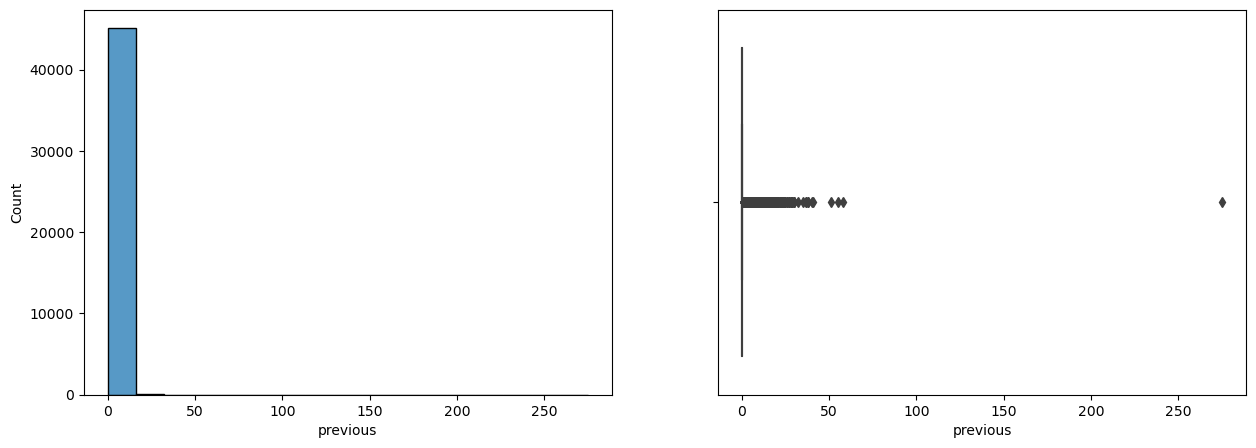

41.84506608797322
4506.362117674052
Positive skew
Leptokurtic


In [33]:
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create histplots for each continuous variable vs. the output variable
   # Calculate skewness and kurtosis
    
for col in continuous_columns:
    skewness = scipy.stats.skew(df[col])
    kurtosis = scipy.stats.kurtosis(df[col], fisher=True)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.histplot(x=col,data=df, ax=ax1)
    sns.boxplot(x=col,data=df, ax=ax2)
    plt.show()
    if skewness > 0.5:
        skewness_d = "Positive skew"
    elif skewness < -0.5:
        skewness_d = "Negative skew"
    else:
        skewness_d = "Little to No skew"
    if kurtosis > 0:
        kurtosis_d = "Leptokurtic"
    elif kurtosis < 0:
        kurtosis_d = "Platykurtic"
    else:
        kurtosis_d = "Mesokurtic"
    print(skewness) 
    print(kurtosis)
    print(skewness_d) 
    print(kurtosis_d)

Understand the distribution of the data for each continuous columns. It creates a histogram, boxplot, outputs the skew & kurtosis, and then interprets the skew & kurtosis given parameters through an if else statement. Some key hilights are balance having a very high skew and kurtosis whic means there is a lot of important data despite their being outliers. This checks out as the data is regarding how much money is in the accounts and we cant remove them because we want to attract customers who deposit more. This is the same for duration which has a high kurtosis and skew to right. This implies that there is a lot of good data; which, makes sense as there might not be a need to contact them if they already signed up for a term deposit meaning the marketing department no longer needs to follow up. Campaign and pdays also have a high skew and kurtosis meaning there is still good data on the ends. The last item is previous which has an abnormal skew and kurtosis.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


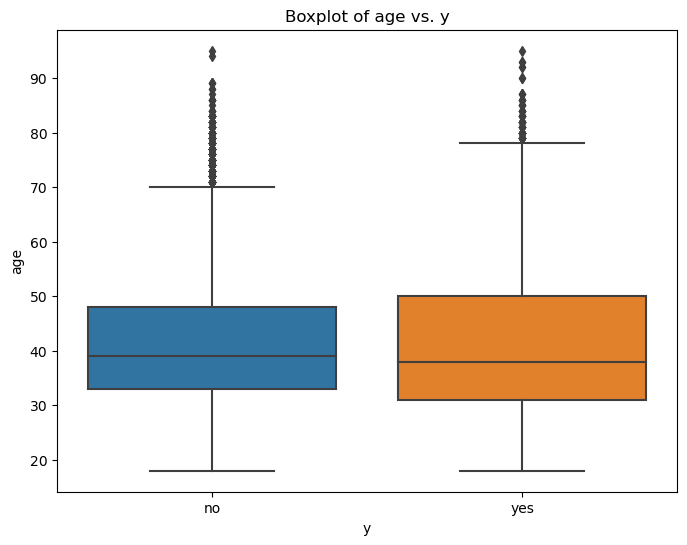

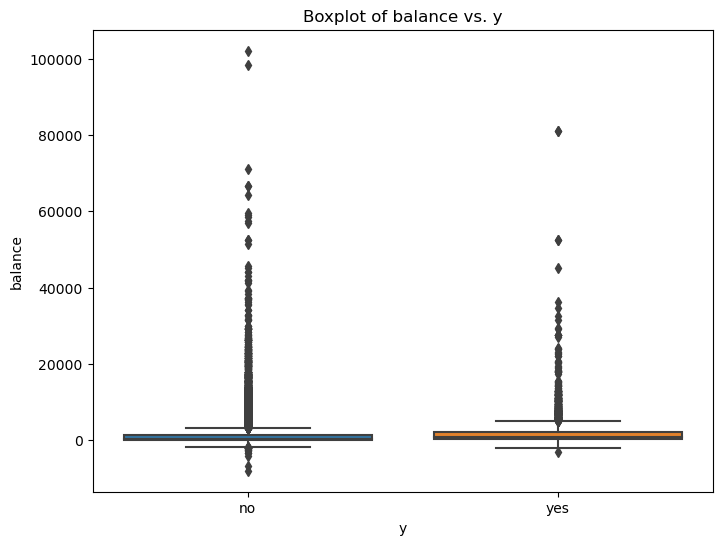

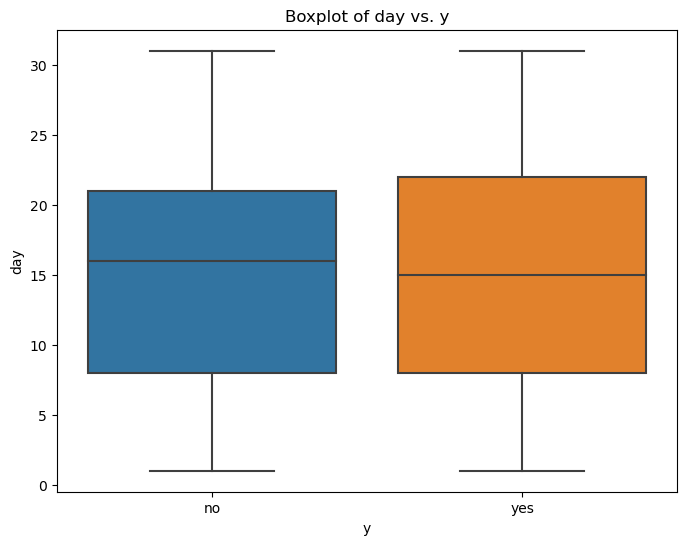

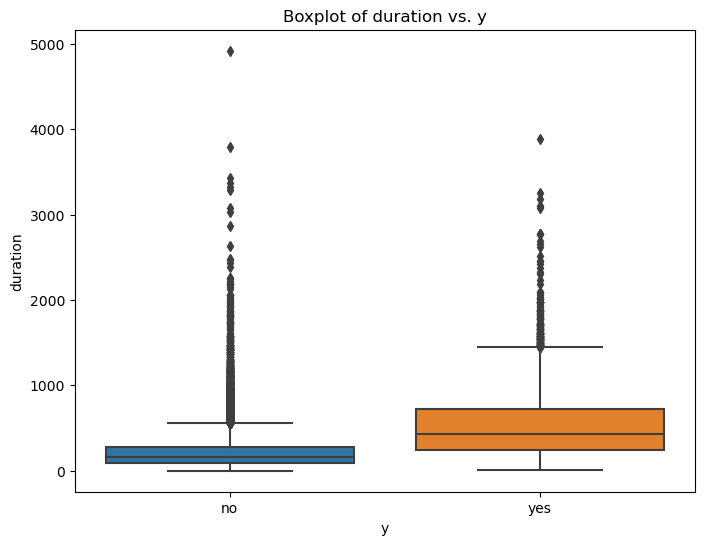

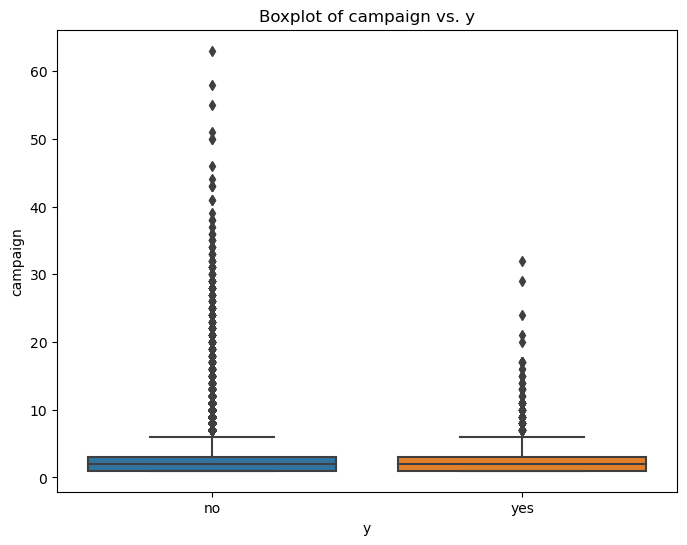

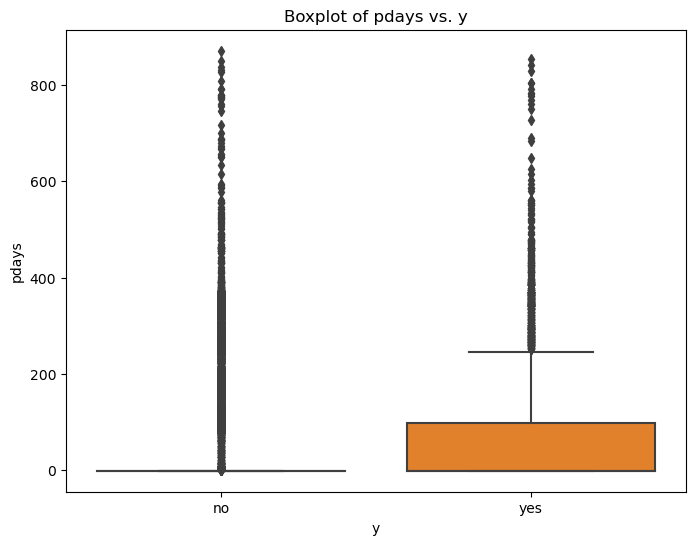

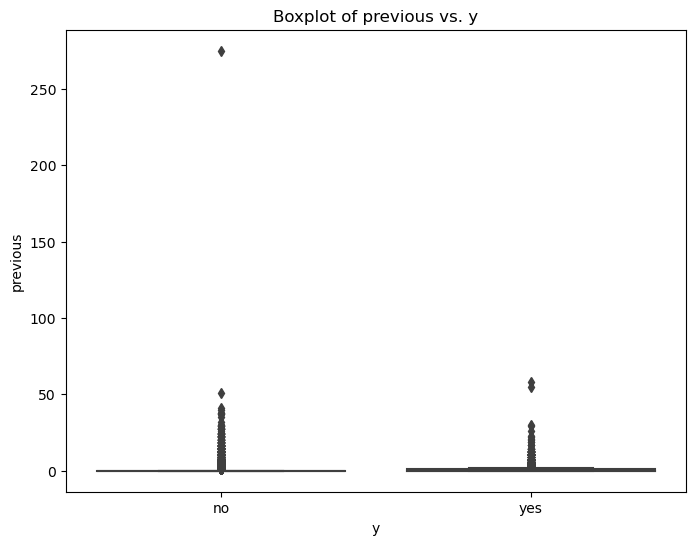

In [35]:
# Select columns with numeric data types (integers or floating-point numbers)
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Output variable (categorical)
output_variable = 'y'

# Create boxplots for each continuous variable vs. the output variable
for col in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=output_variable, y=col, data=df)
    plt.title(f'Boxplot of {col} vs. {output_variable}')
    plt.show()

The above code creates a boxplot comparing y to the continous columns in the dataset. It seems that age and days have least variation and might not be relevant to the models; however, we can allow the models to make that judgement.

In [36]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [37]:
import time 
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

This is the modules we need to import to create the basline and ensemble models

In [38]:
value_counts = df['y'].value_counts()

# Calculate percentages, assuming 'yes' and 'no' are two unique values in the 'response' column
yes_count = value_counts.get('yes', 0)
no_count = value_counts.get('no', 0)
total_count = len(df)
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100

print(f'Percentage of "yes": {percentage_yes:.2f}%')
print(f'Percentage of "no": {percentage_no:.2f}%')

Percentage of "yes": 11.70%
Percentage of "no": 88.30%


One thing I noticed in the dataset that this code confirms is the fact taht a lot of the samples say no compared to them saying yes demonstrating that the data is not balanced. This means we need to account for this in sampling when builidng the pipeline code.

In [39]:
y= df['y']
X= df.drop('y', axis=1)

In [40]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [44]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [45]:
results = {}

The above is the first part of building the pipline by splitting the number into categorical/numerical, splitting the data into training and testing with a 0.2 sample size while identifying the models we are going to use. Then comes the issue of sampling RandomOverSampler with a minority sampling strategy or Synthethic Minority Oversampling with a 0.5 class size were the two methods I tried. The first one generates duplicate samples to balance the minority class of yes while SMOTE generates synthethic samples through interpolation. After trying both I generally found better results with SMOTE so I kept it.

In [46]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('resampler', SMOTE(sampling_strategy=0.5)),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
   
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    recall = recall_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    f1 = f1_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.457474  0.689990  0.550174  0.871613  1.294291
Logistic Regression   0.488453  0.678328  0.567941  0.882561  1.319296
Decision Tree         0.457389  0.568513  0.506932  0.874157  1.009228
Random Forest         0.581950  0.545190  0.562970  0.903682  6.952593
AdaBoost              0.510026  0.568513  0.537684  0.888754  6.413783
Bagging               0.551515  0.530612  0.540862  0.897490  4.170375
Voting                0.512617  0.690962  0.588576  0.890081  2.662556


KNN has a relatively high recall, indicating that it is effective at capturing positive instances. However, its precision is lower, suggesting a higher rate of false positives. It achieves good accuracy, but the execution time is moderate. Logistic Regression offers a balanced trade-off between precision and recall, with a reasonable F1-Score. It achieves good accuracy and has a moderate execution time. The Decision Tree model has similar performance to KNN, with a relatively low F1-Score. It captures positive instances moderately well but lacks precision. It offers good accuracy and a relatively fast execution time. Random Forest has the highest precision among the models, indicating a lower rate of false positives. However, its recall is lower, which means it might miss some positive instances. It achieves excellent accuracy but has a longer execution time. AdaBoost offers a reasonable balance between precision and recall, with a moderate F1-Score. It achieves good accuracy but has a longer execution time. Bagging provides a balanced trade-off between precision and recall, with a moderate F1-Score. It achieves good accuracy and has a moderate execution time. The Voting ensemble model combines the strengths of individual models, resulting in a balanced precision and recall. It achieves good accuracy and has a moderate execution time.

In [47]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [49]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('resampler', SMOTE(sampling_strategy=0.5)),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    recall = recall_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    f1 = f1_score(y_test, y_pred, pos_label='yes')  # Set pos_label to 'yes'
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results in tuned_results dictionary
    tuned_results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert tuned_results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                     Precision    Recall  F1-Score  Accuracy    Time (s)
K-Nearest Neighbors   0.472329  0.713314  0.568331  0.876700   32.002527
Logistic Regression   0.494677  0.677357  0.571780  0.884552   13.995608
Decision Tree         0.474268  0.582119  0.522688  0.879022   17.622423
Random Forest         0.582719  0.537415  0.559151  0.903572  376.361712
AdaBoost              0.527829  0.552964  0.540104  0.892845   80.666084
Bagging               0.547502  0.543246  0.545366  0.896937   56.613756
Voting                0.507418  0.664723  0.575515  0.888422   18.650540


KNN has shown improvements in precision, recall, and F1-Score. It is now better at capturing positive instances, but it comes at the cost of significantly increased execution time.  Logistic Regression has shown improvements in precision and F1-Score. It maintains a reasonable balance between precision and recall, but the execution time has also increased. Decision Tree has shown slight improvements in multiple metrics, maintaining a balanced performance. Random Forest has shown improvements in precision and accuracy. However, the execution time has significantly increased. AdaBoost has shown slight improvements in multiple metrics, but the execution time has significantly increased. Bagging has shown slight improvements in multiple metrics, but the execution time has significantly increased. Voting has shown improvements in recall and F1-Score, indicating better performance in capturing positive instances

Why did the ensemble models perform the way they did?

Beyond the hyperparameters, use your understanding of how the models work to explain why you think the models performed they way they did on the given data set. Was the result what you were expecting? Why or why not?

Ensemble models combine multiple base models to make predictions. The effectiveness of these ensembles often depends on the diversity of the base models since KNN and Logistic Regression did not perform super well in term of precision expecting the ensemble models  to perform well in precision is a false hope. Ensemble models are often robust to outliers in the data. Outliers can have a significant impact on the performance of some models. Ensemble methods like Bagging and Random Forest can mitigate the influence of outliers by averaging predictions or aggregating results from multiple trees. If the dataset is imbalanced (i.e., one class is significantly more prevalent than the other), ensemble models can handle this situation better than some other algorithms. In Voting ensembles, combining the predictions of multiple models can lead to a more robust and accurate prediction. It can smooth out individual model biases and errors. Ensemble models can be computationally expensive, as seen in the increased execution times particular in this case Random Forest.

If you had to pick one model to implement in business process, which would it be and why?

Discuss the business implications.
Consider not only performance metrics but also computational cost and interpretability.
What decision criteria did you use to arrive at this conclusion?
Precision-Recall trade-off? Computational cost? Others?

The choice between precision and recall depends on the bank's marketing strategy and priorities and it has to be a business decision.
High precision means that when the model predicts that a customer will subscribe to a term deposit, it is very likely to be correct.
High recall means that the model is good at identifying all the customers who are genuinely interested in subscribing to a term deposit. 
I think as a business decision maker a bank wants to ensure that it captures as many potential customers as possible and is willing to accept some false positives, thus indicating that recall is more important. High recall ensures that a larger portion of interested customers is reached, potentially leading to increased revenue. Ultimately, the balance between precision and recall should be determined based on a cost-benefit analysis, considering the bank's marketing budget, the potential revenue from new subscriptions, and the tolerance for false positives but this is the business criteria given the current information. Therefore the best model is KNN which maximizes recall at 0.713314. It is true it has the lowest accuracy however 0.876700 is less than 3% away from 0.903572 so its not a huge tradeoff. Furhtermore, a bank makes money by long-term care of clients so even if they attract false positives for a term-deposit having a larger portion of interested customers could potentially lead to increased revenue at the bank as they are interested they just might not be interested in a term deposit be interested in any bank services. Additionally, KNN offers a reasonably high precision, indicating that when it predicts a customer is likely to subscribe, it is often correct. This helps the bank avoid wasting resources on customers who are unlikely to convert, contributing to cost savings. Furthermore, KNN is relatively interpretable. It makes predictions based on the similarity of customers' features, which can be explained to stakeholders more intuitively than complex models like Random Forest. Therefore, in a scenario where the bank's primary goal is to maximize the identification of potential customers who will subscribe to a term deposit while maintaining a reasonable level of interpretability, KNN stands out as a strong candidate and is my choice; however, it's essential to consider the trade-offs and consult with stakeholders to align the model choice with specific business objectives and constraints as their is limited information on the size, budget, target market, etc. of the bank.







